# 2. Bond Pricing

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from datetime import datetime

## 2.1. Examples of bond pricing


### 2.1.1 Nominal rates

Let's consider an investment of USD  1,000 today that will return USD 1,100 in one year. This means that this investment returns an efective annual interest rate $r_{eff}$ of 10%. We will now calculate the equivalent nominal interest rate for different compounding periods. We first introduce the following formula where $r$ is the nominal interest rate and $m$  is the number of compounding periods in a year, the the yearly effective interest rate becomes:

\begin{equation}
1 + r_{eff} = \left( 1+ \frac{r}{m} \right)^m \tag{8}
\end{equation}

we use equation (8) to get the nominal interest rate as:

\begin{equation}
r = m((1+r_{eff})^{\frac{1}{m}} -1) \tag{9}
\end{equation}

We use equation (9) to calculate the nominal interest rates for different compounding periods given the effective interest rate $r_{eff}$ = 10%, then:

**a) Annual compounding:** $m$=1, $r$=10% \\
**b) Semi-annual compounding:** $m$=2, $r$=9.76% \\
**c) Monthly compounding:** $m$=12, $r$=9.57% \\
**d) Continuous compounding:** In here, we take equation (8) to reformulate the problem for $t$ years. We obtain the following equation:

\begin{equation*}
1 + r_{eff} = \left( 1+ \frac{r}{m} \right)^{mt}
\end{equation*}

As we are dealing with continuouis compounding, we study the result for $m$ going to infinity:

\begin{equation}
\lim_{m \rightarrow \infty} \left( 1 + \frac{r}{m} \right)^{mt}  \tag{10}
= e^{rt}
\end{equation}

Hence the continuous compounding rate after 1 year ($t=1$) is $r= ln(1 + r_{eff})$ which in our case is 

$r$ = 9.53%.

### 2.1.2 Equivalent rates

In this section, we will see what interest with continuous compounding is equivalent to 15% annual rate with monthly compounding. Using equation (8) and (10) we can derive the fdolloiwng equation:

\begin{equation*}
e^r = \left( 1 + \frac{0.15}{12} \right)^{12}
\end{equation*}

Solving this equation gives us $r$ = 14.91%.

### 2.1.3 Interest calculation

This section will evaluate the interest paid on a 10,000 USD deposit that pays 12% per anum with continuous compounding but only receives interest each quarter.

As $r=12\%$, we know that the effective rate is $r_{eff} = e^r - 1 =12.75\%$. Since the interest are paid quaterly, we can use the same equation to get the quarterly effective rate as $r_{eff} = e^{0.12/4} - 1 = 3.045\%$. We can then have the detail of the interests paid quarterly on an initial investment of 10,000 dollars as follow:

First quarter: $\$ 304.5$ \\
Second quarter: $\$ 313.77$ \\
Third quarter: $\$ 323.33$ \\
Forth quarter: $\$ 333.17$ \\

Note: these numbers are approximations to the second digit

## 2.2 Forward Rates

### 2.2.1 Forward rates example

In this section, we discuss an investment with a one-year interest rate $r_1$ of 5% and a two-year interest rate $r_2$ of 7%. Investing in the two year investment brings an additional $1.07^2/1.05 - 1 = 9\%$ addtional return.

**a)** The one year investment allows more flexibility to the investor to get their money back with interest and use it for other investments. Locking the money up for a longer period of time rewards the investor with a higher interest rate. For no arbitrage to exist, these two strategies should be equivalent as the two year investment should already include the expected 1 year spot rate for next year into these assets. Therefore, in theory, the investor should be neutral on whether to invest one year with rate $r_1$ or two years with rate $r_2$. 

**b)** As discussed above, the strategy should not be based on the rates offered for different investment periods as the expected forward rates should already be included in these rates, but the strategy should focus on opportunity cost of investing and need of liquidity. The implied forward rate in $r_2$ of 9% should be close to the forward market rate, although they can slighly differ due to market's imperfections.

**c)** The forward rate $f_{1,2}$ is higher than the current rates $r_1$ and $r_2$ as investors take the risk of future interest rate changes which can impact their investment either way. If interest rates go up, then the investor has potentially missed out on more income while if they go down, then he should have bought the assets with the implied forward interest rate of 9%. These are often used as hedges against interest rate change but can go either way for the investor.

**d)** Forward rates are calculated using the forecasted spot rates. Given the spot rates $s_i$ and $s_j$ for the $i^{th}$ and $j^{th}$ years, the implied forward rate $f_{i,j}$ can be calculated as follow:

\begin{equation*}
f_{i,j} = \left[ \frac{(1+s_j)^j}{(1+s_i)^i}\right]^{1/(j-i)}  - 1
\end{equation*}

Note that market forward rates are usually different from the implied forward rates due to inefficient market imperfections.

## 2.3 Duration of a Coupon-Bearing Bond

### 2.3.1 Macaulay duration

The duration, or Macaulay duration is the weighted average of the times to each of the cash payments. The weight for each year is the present value of the cash flow received at the time divided by the total value of the bond:

\begin{equation*}
Duration = \frac{1 \times PV(C_1) + 2 \times PV(C_2) + \cdots T \times PV(C_T)}{PV}
\end{equation*}

We compute the duration for the 1% seven-year treasury bond asuming annual payments in the table below. We first compute the present value of the payment cash flow stream as well as the final face value. We obtain a total present value of \$ 768.55 . We then, compute the proportion of each present value to the total present value and multiply that by the year to obtain the duration of each cash flow. Adding these up, we obtain a duration of 6.76.

In [ ]:
df = pd.DataFrame(
    columns=['Year 1','Year 2','Year 3','Year 4','Year 5','Year 6','Year 7','Total'],
    index=['Payment','PV(Ct)','PV(Ct)/PV','t * PV(Ct)/PV']
)
df.loc['Payment'] = [10,10,10,10,10,10,1010,1070]

bondPV = 0
for i, paymentt in enumerate(list(df.loc['Payment'].values)[:-1]):
    pvt = paymentt / (1 + 0.05)**(i+1)
    df.iloc[1,i] = round(pvt,2)
    bondPV += pvt
df.iloc[1,7] = round(bondPV,2)

for i, pv_t in enumerate(list(df.loc['PV(Ct)'].values)[:-1]):
    weight = round(pv_t / bondPV,3)
    df.iloc[2,i] = weight
    df.iloc[3,i] = weight * (i + 1)

weight_total = 0
duration = 0
for i, dt in enumerate(list(df.loc['t * PV(Ct)/PV'].values)[:-1]):
    duration += dt
    weight_total += df.iloc[2,i]

df.iloc[2,7] = round(weight_total)
df.iloc[3,7] = round(duration,2)

pd.DataFrame.to_latex(df)

'\\begin{tabular}{lllllllll}\n\\toprule\n{} & Year 1 & Year 2 & Year 3 & Year 4 & Year 5 & Year 6 &  Year 7 &   Total \\\\\n\\midrule\nPayment       &     10 &     10 &     10 &     10 &     10 &     10 &    1010 &    1070 \\\\\nPV(Ct)        &   9.52 &   9.07 &   8.64 &   8.23 &   7.84 &   7.46 &  717.79 &  768.55 \\\\\nPV(Ct)/PV     &  0.012 &  0.012 &  0.011 &  0.011 &   0.01 &   0.01 &   0.934 &       1 \\\\\nt * PV(Ct)/PV &  0.012 &  0.024 &  0.033 &  0.044 &   0.05 &   0.06 &   6.538 &    6.76 \\\\\n\\bottomrule\n\\end{tabular}\n'

### 2.3.2 Modified duration

Investors and financial managers track duration because it measures how bond prices change when interest rates change. For this purpose it is best to use modified duration or volatility which is the percentage change in the bond's price for a change in the yield λ:

\begin{equation*}
D_M = -\frac{1}{P(λ_0)}\frac{dP(λ)}{dλ} = \frac{D}{1 + λ/m}
\end{equation*}

The bond in the table has a yield λ = 5% and we take annual compounding hence m = 1. The modified duration is hence:

\begin{equation*}
D_M = \frac{6.76}{1+ 0.05} = 6.44
\end{equation*}

The modifed duration is lower than the Macaulay duration and would have been equal for continuous compounding (that is $m \rightarrow \infty$ and hence $D_M = D$).

### 2.3.3 Advantages of duration against volatility

A bond with a longer time to maturity has a price very sensitive to he yield and is more impacted by unexpected changes in interest rates. Duration gives investors a quantitative measure of that interest rate sensitivity and the risk level of a bond. For example, in the previous section, if the yield increases by 1%, the price of the bond would fall 6.44%. Using duration, we can however hedge that risk using "Immunisation", which is a strategy matching the price and duration of the assets and liabilities in a portfolio to protect against interest rate changes. This can useful for pension funds for example to protect to minimise the risks.

## 2.4. Capital Asset Pricing Model (CAPM) and Arbitrage Pricing Theory (APT)

In this section, we will study the daily returns of 157 european companies and study the Capital Asset pricing model (CAPM) as well as the Arbitrage pricing theory (APT). CAPM is is a model that estimates the retrun of an individual asset in the presence of a risk-free asset assuming certain market conditions. Using CAPM, the retrun for an asset $i$, $R_i$ is:

\begin{equation}
r_i = r_f + \beta_i (r_M - r_f) + \epsilon_i \tag{11}
\end{equation}

where $r_f$ is the risk free return, $r_M$ is the market return, and $\epsilon_i$ is the company specific risk uncorrelated to the market. The asset sensitivity to the market $\beta_i$ is given by:

\begin{equation}
\beta_i = \frac{cov(r_i, r_M)}{var(r_M)} \tag{12}
\end{equation}

We can then define the expected return of an asset $i$ as:

\begin{equation}
\bar{r_i} = r_f + \beta_i (\bar{r_M} - r_f) \tag{13}
\end{equation}

In [ ]:
df = pd.read_csv(r'fsp_case_31_BSD.csv', index_col=0, header =[0,1])

### 2.4.1 Non-weighted market return

In this section, we estimate the daily market return $r_M$ averaging the daily returns of each of the 157 companies (note that the results only show the results for 141 companies as some of the data points are missing for 16 companies). We plot the non-weighted results below and observe an average return of 0.005% with an average standard deviation of 0.0067.

We obtain a Sharpe ratio of 141 for the non-weighted market portfolio.

In [ ]:
# non-weighted market returns
nw_market_returns = df['ret'].dropna(axis=1).mean(axis=1)

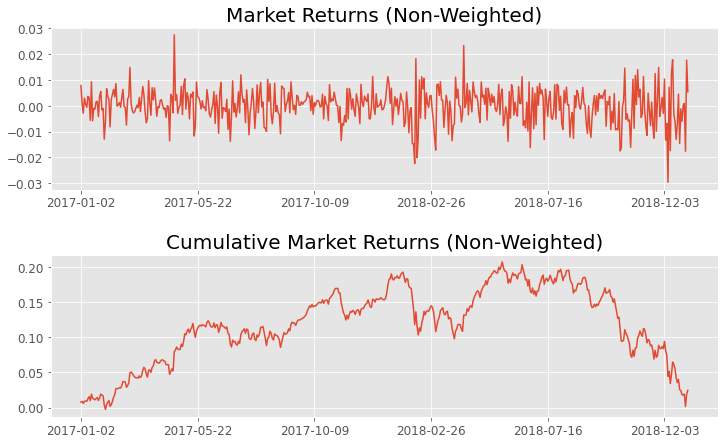

In [ ]:
# Plot the figures
fig, axes = plt.subplots(2,1, figsize=(10,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

nw_market_returns.plot(ax=axes[0], fontsize=12); axes[0].set_title('Market Returns (Non-Weighted)', fontsize=20)
nw_market_returns.cumsum().plot(ax=axes[1], fontsize=12); axes[1].set_title('Cumulative Market Returns (Non-Weighted)', fontsize=20)

fig.savefig('Market_Returns.eps', dpi=200, bbox_inches='tight')

In [ ]:
print('Market return mean (non-weighted): ', round(nw_market_returns.mean()*100,3), '%')
print('Market return std deviation (non-weighted): ', round(nw_market_returns.std(),4))

Market return mean (non-weighted):  0.005 %
Market return std deviation (non-weighted):  0.0067


### 2.4.2 Non-weighted rolling beta

In this section, we calculate the rolling $\beta$ for each company for a window of 22 days (one trading month). We use equation (12) hence we need to calculate the covariance of each asset with the market and the variance of the market both for a 22 day rolling window. We plot the rolling $\beta$s in the first plot and then present the mean and standard variation of these. The average $\beta$ value for a company is just under 1 while the standard variaiton is 0.55. 

An average $\beta$ of 1 signifies that, on average, a company moves together with the market and this tends not to be very volatile. However, we also see that individually companies can have very volatile $\beta$s which means that certain companies tend to be less consistent with the market than others.

In [ ]:
nw_returns = df['ret'].dropna(axis=1)
nw_returns['market'] = nw_market_returns

window = 22
nw_betas_df = pd.DataFrame(columns=nw_returns.columns) 

for i in range(0, len(nw_returns)-window+1):
    cov_matrix = nw_returns.iloc[i:i+window].cov()
    betas = cov_matrix['market'] / cov_matrix['market']['market']
    t = nw_returns.index[i+window-1]
    nw_betas_df.loc[t] = betas

nw_betas_stats = pd.DataFrame(index=nw_betas_df.columns, columns=['mean', 'std']) 
nw_betas_stats['mean'] = nw_betas_df.mean()
nw_betas_stats['std'] = nw_betas_df.std()

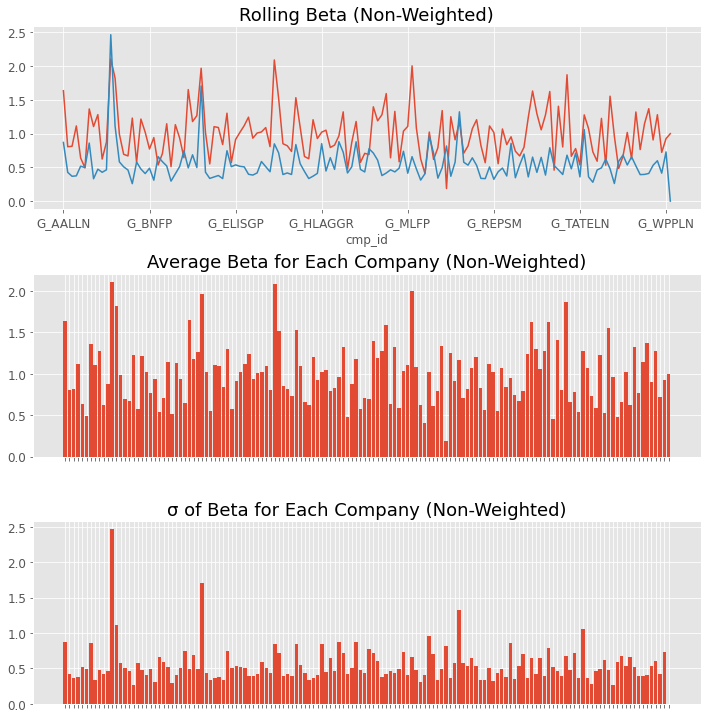

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)


nw_betas_stats.plot(ax=axes[0], fontsize=12, legend=False); 
axes[0].set_title('Rolling Beta (Non-Weighted)', fontsize=18); 

axes[1].bar(nw_betas_stats.index, nw_betas_stats['mean']); 
axes[1].set_title('Average Beta for Each Company (Non-Weighted)', fontsize=18); 
axes[1].set_xticklabels(""); axes[1].tick_params(labelsize=12)

axes[2].bar(nw_betas_stats.index, nw_betas_stats['std']); 
axes[2].set_title('\u03C3 of Beta for Each Company (Non-Weighted)', fontsize=18); 
axes[2].set_xticklabels(""); axes[2].tick_params(labelsize=12)


fig.savefig('Rolling_Betas_with_Stats.eps', dpi=200, bbox_inches='tight')

In [ ]:
print('average rolling beta among companies (non-weighted): ', round(nw_betas_stats['mean'].mean()))
print('average \u03C3 among companies (non-weighted): ', round(nw_betas_stats['std'].mean(),2))

average rolling beta among companies (non-weighted):  1
average σ among companies (non-weighted):  0.55


### 2.4.3 Mcap-weighted market return

In this section, we will evaluate market returns by weighting the companies based on their market capitalisaiton. The cap-weighted market return $R_m$ is given by:

\begin{equation*}
R_m = \sum_{i} = \frac{mcap_i \times ret_i}{\sum_{i} mcap_i}
\end{equation*}

The marketcap weighted market return gives us an average retrun of 0.019% with an average standard devaition of 0.0066. Here the sharpe ratio is 35, much smaller than the one of the non-weighted market return as the small-cap stocks represent a much greater risk and are more volatile but given their small proportion in the mcap weighted market return, that risk is vastly dissipated.

In [ ]:
w_returns = df['ret'].dropna(axis=1)
mcaps = df['mcap'][w_returns.columns]
weights = mcaps.divide(mcaps.sum(axis=1), axis=0)

w_market_returns = (weights*w_returns).sum(axis=1)

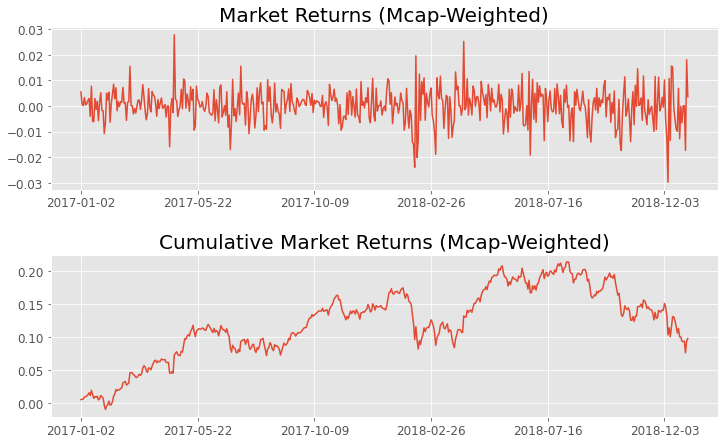

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

w_market_returns.plot(ax=axes[0], fontsize=12); axes[0].set_title('Market Returns (Mcap-Weighted)', fontsize=20)
w_market_returns.cumsum().plot(ax=axes[1], fontsize=12); axes[1].set_title('Cumulative Market Returns (Mcap-Weighted)', fontsize=20)

fig.savefig('Weighted_Market_Returns.eps', dpi=200, bbox_inches='tight')

In [ ]:
print('Market return mean (mcap-weighted): ', round(w_market_returns.mean()*100, 3), '%')
print('Market return standard deviation (mcap-weighted): ', round(w_market_returns.std(),4))

Market return mean (mcap-weighted):  0.019 %
Market return standard deviation (mcap-weighted):  0.0066


### 2.4.4 Mcap-weighted rolling beta

In this section, we take a similar approach as in section 2.4.2 estimating rolling $\beta$s but this time using mcap weighted market return. The plots below are similar to the ones in section 2.4.2. The average $\beta$ is 0.96 (lower than the non-weighted method) and the standard deviation is 0.56 (slighly higher than the non-weighted method).

In [ ]:
w_returns['market'] = w_market_returns

window = 22
w_betas_df = pd.DataFrame(columns=w_returns.columns) 

for i in range(0, len(w_returns)-window+1):
    cov_matrix = w_returns.iloc[i:i+window].cov()
    betas = cov_matrix['market'] / cov_matrix['market']['market']
    t = w_returns.index[i+window-1]
    w_betas_df.loc[t] = betas

w_betas_stats = pd.DataFrame(index=w_betas_df.columns, columns=['mean', 'std']) 
w_betas_stats['mean'] = w_betas_df.mean()
w_betas_stats['std'] = w_betas_df.std()

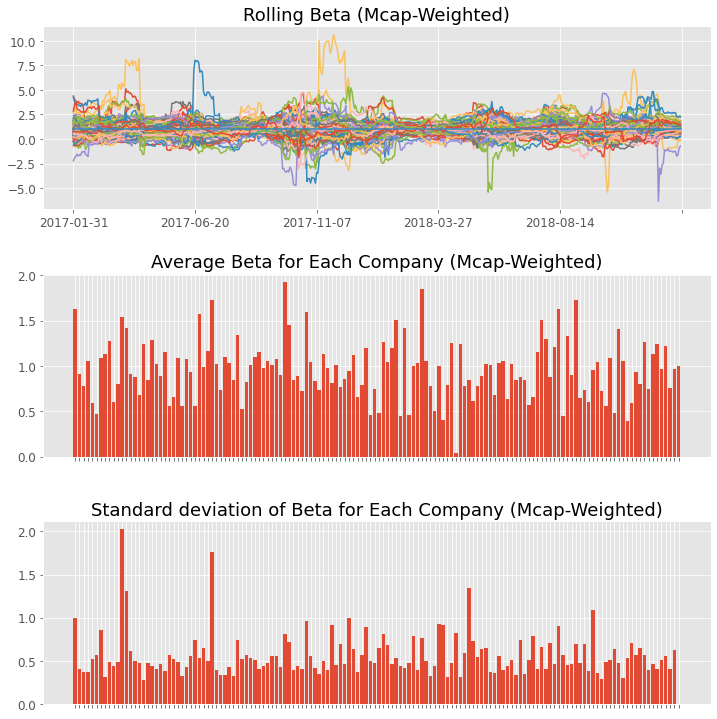

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)


w_betas_df.plot(ax=axes[0], fontsize=12, legend=False); 
axes[0].set_title('Rolling Beta (Mcap-Weighted)', fontsize=18); 

axes[1].bar(w_betas_stats.index, w_betas_stats['mean']); 
axes[1].set_title('Average Beta for Each Company (Mcap-Weighted)', fontsize=18); 
axes[1].set_xticklabels(""); axes[1].tick_params(labelsize=12)

axes[2].bar(w_betas_stats.index, w_betas_stats['std']); 
axes[2].set_title('Standard deviation of Beta for Each Company (Mcap-Weighted)', fontsize=18); 
axes[2].set_xticklabels(""); axes[2].tick_params(labelsize=12)


fig.savefig('Rolling_Betas_with_Stats_Weighted.eps', dpi=200, bbox_inches='tight')

In [ ]:
print('average rolling beta among companies (mcap-weighted): ', round(w_betas_stats['mean'].mean(),2))
print('average standard deviation among companies (mcap-weighted): ', round(w_betas_stats['std'].mean(),2))

average rolling beta among companies (mcap-weighted):  0.96
average standard deviation among companies (mcap-weighted):  0.56


### 2.4.5 Arbitrage pricing theory (APT)

**a)** In this section, we assume that the Arbitrage pricing theory holds for a two-factor model and hence we can write:

\begin{equation}
r_i = a + b_{mi}R_m + b_{si}R_s + \epsilon_i \tag{14}
\end{equation}

where $b_{mi}$ is the exposure to the market return $R_m$ and $b_{si}$ is the exposure to $R_s$ the return relevant to size. We assume that $b_{si} = ln(size)$ and hence we can rewrite equation (14) as:

\begin{equation*}
\mathbf{r} = \mathbf{Bx} + \mathbf{e}
\end{equation*}

where 

\begin{equation*}
\mathbf{r} = \begin{bmatrix}  r_1 \\ r_2 \\ \vdots \\ r_n \end{bmatrix},
\mathbf{B} = \begin{bmatrix}  1 & b_{m1} & b{s1} \\ 1 & b_{m2} & b{s2} \\ \vdots & \vdots & \vdots\\ 1 & b_{mn} & b{sn} \end{bmatrix},
\mathbf{x} = \begin{bmatrix}  a \\ R_m \\ R_s \end{bmatrix},
\mathbf{e} = \begin{bmatrix}  \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}
\end{equation*}

Since the values of $\mathbf{r}$ and $\mathbf{B}$ are known, we can use Ordinary Least Squares method to determine $a, R_m$ and $R_s$ as:

\begin{equation}
\mathbf{x} = (\mathbf{B}^T\mathbf{B})^{-1}\mathbf{B}^T\mathbf{r} \tag{15}
\end{equation}

In [ ]:
ri = df['ret'].dropna(axis=1).loc[w_betas_df.index]
bm = w_betas_df.iloc[:,:-1]
bs = np.log(mcaps.loc[w_betas_df.index])
factors_df = pd.DataFrame(index=ri.index, columns=['a', 'Rm', 'Rs'], dtype='float64')
E = pd.DataFrame(index=ri.index, columns=ri.columns)

In [ ]:
for t in ri.index:
    rt = ri.loc[t].values.reshape(-1,1)

    bmt = bm.loc[t].values.reshape(-1,1)
    bst = bs.loc[t].values.reshape(-1,1)
    ones = np.ones(bst.shape)
    Bt = np.hstack((ones, bmt, bst))

    ft = np.linalg.inv(Bt.T.dot(Bt)).dot(Bt.T).dot(rt)
    
    factors_df.loc[t] = ft.T
    E.loc[t] = (rt - Bt.dot(ft)).T

**b)** We plot the daily values for the parameters $a, R_m$ and $R_s$ in the figure below as well as their mean and standard variation.

We see that the magnitude of a is the biggest on average, which we expect as it reflects the upward trend in the market. We also notice that the market factor is bigger than the size factor, however the average exposure to the market factor is about 1 while the exposure to the size is around 20. We could also note that $R_m$ has the worst sharpe ratio among the parameters. 

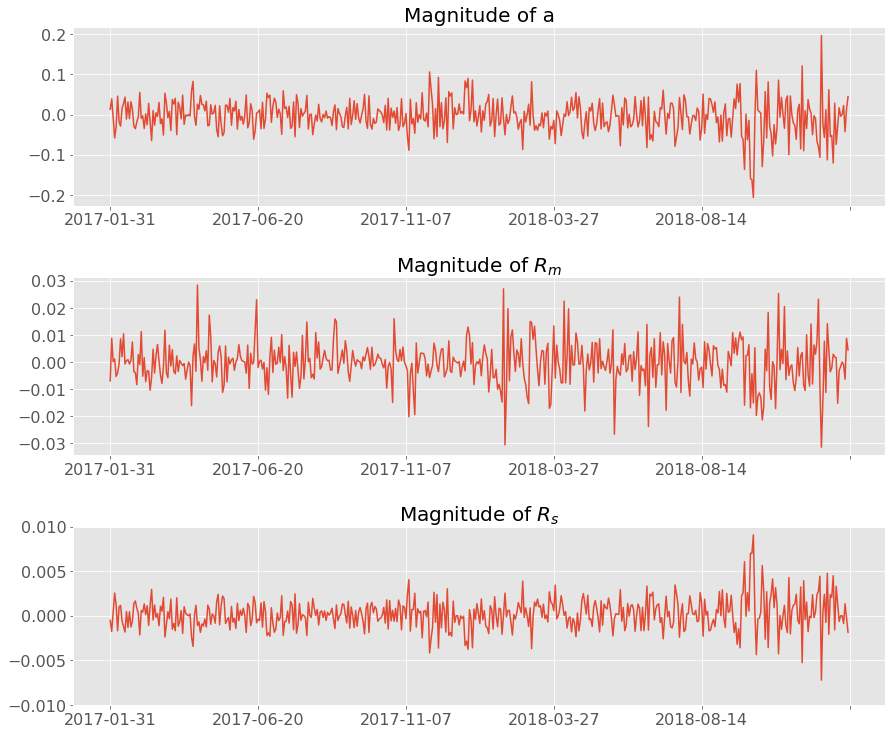

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(12,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

yticks = np.arange(-0.20, 0.21, 0.10)
factors_df['a'].plot(ax=axes[0], yticks=yticks, fontsize=16); axes[0].set_title("Magnitude of a", fontsize=20)

factors_df['Rm'].plot(ax=axes[1], fontsize=16); axes[1].set_title("Magnitude of $R_m$", fontsize=20)

yticks = np.arange(-0.010, 0.011, 0.005)
factors_df['Rs'].plot(ax=axes[2], yticks=yticks, fontsize=16); axes[2].set_title("Magnitude of $R_s$", fontsize=20)


fig.savefig('Estimated_Factors.eps', dpi=200, bbox_inches='tight')

In [ ]:
factor_stats = pd.DataFrame(columns=['a', 'Rm', 'Rs'], index=['mean', 'std', '|mean/std|'])
factor_stats['a'] = [factors_df['a'].mean(), factors_df['a'].std(), abs(factors_df['a'].std()/factors_df['a'].mean())]
factor_stats['Rm'] = [factors_df['Rm'].mean(), factors_df['Rm'].std(), abs(factors_df['Rm'].std()/factors_df['Rm'].mean())]
factor_stats['Rs'] = [factors_df['Rs'].mean(), factors_df['Rs'].std(), abs(factors_df['Rs'].std()/factors_df['Rs'].mean())]
pd.DataFrame.to_latex(factor_stats)

'\\begin{tabular}{lrrr}\n\\toprule\n{} &         a &         Rm &        Rs \\\\\n\\midrule\nmean       & -0.004216 &  -0.000286 &  0.000192 \\\\\nstd        &  0.041191 &   0.007913 &  0.001732 \\\\\n|mean/std| &  9.771005 &  27.670946 &  9.004126 \\\\\n\\bottomrule\n\\end{tabular}\n'

**c)** In this section, we study the correlation between the returns $r_i$ and the specific returns $\epsilon_i$ which are plotted on the left of the figure below. We see a positive linear trend which indicates a strong correlation between these values. The histogram on the right confirms that theory as all the values are above 0.60 and the average correlation is 0.81, which is very high. Since $\epsilon_i$ is the difference between the real returns and the retruns explainable by the factors, the high correlation between the two factors indicates that they are not sufficient to to explain the given returns (otherwise correlation would be 0 but as it is high, this means that they explain the same part of the returns).

Average correlation:  0.81


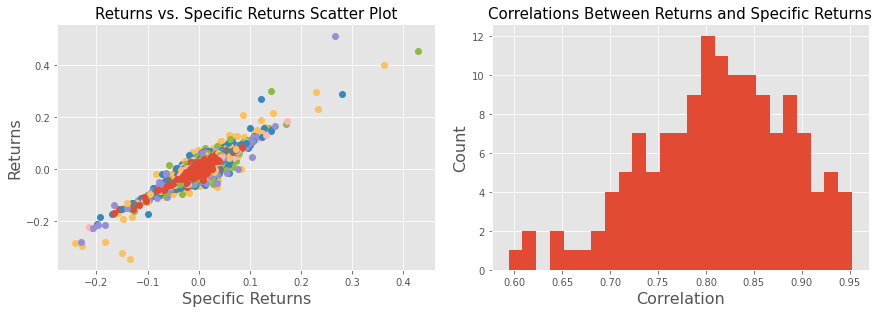

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
fig.tight_layout()
fig.subplots_adjust(wspace=0.15)


for company in E.columns:
    axes[0].plot(E[company], ri[company], 'o')

axes[0].set_title('Returns vs. Specific Returns Scatter Plot', fontsize=15)
axes[0].set_xlabel('Specific Returns', fontsize=16)
axes[0].set_ylabel('Returns', fontsize=16)


return_sreturn_corr = pd.Series(index=E.columns, dtype='float64')
for company in E.columns:
    return_sreturn_corr[company] = stats.pearsonr(E[company], ri[company])[0]

return_sreturn_corr.hist(ax=axes[1], bins=25)
axes[1].set_title('Correlations Between Returns and Specific Returns', fontsize=15)
axes[1].set_xlabel('Correlation', fontsize=16)
axes[1].set_ylabel('Count', fontsize=16)
print('Average correlation: ', round(return_sreturn_corr.mean(),2))


fig.savefig('Returns_and_Specific_Returns_Correlation.eps', dpi=200, bbox_inches='tight')

**d)** In this section, we explore the magnitude and stability of the covariance matrix $cov(R)$ using a rolling window of 22 days (one trading month) and is defined as follows:

\begin{equation*}
R = \begin{bmatrix} R_{m1} & R{s1} \\ \vdots & \vdots \\ R_{m500} & R{s500} \end{bmatrix} \end{equation*}

We plot the covariance matrix magnitude below and we see that the signal is highly fluctuating suggesting instability. From the magnitude percentage change plot we also observe that the values can drastically change from oine day to another, re-engorcing the sentiment of instability. We concludes that the past estimations of covariance values tend to be obselete to determine the future ones.

In [ ]:
R = factors_df[['Rm', 'Rs']]

window = 22
rolling_R_covs = []
rolling_stats = pd.DataFrame(columns=['magnitude', 'max change'], index= R.index[window-1:]) 

for i in range(0, len(R)-window+1):
    Rt = R.iloc[i:i+window]
    t = R.index[i+window-1]
    cov_Rt = Rt.cov()
    
    rolling_R_covs.append(cov_Rt)
    rolling_stats.loc[t]['magnitude'] = np.linalg.norm(cov_Rt)
    if i != 0:
        cov_Rt_prev = rolling_R_covs[i-1]
        changes = abs((cov_Rt - cov_Rt_prev) / cov_Rt_prev)
        rolling_stats.loc[t]['max change']  = changes.stack().max()

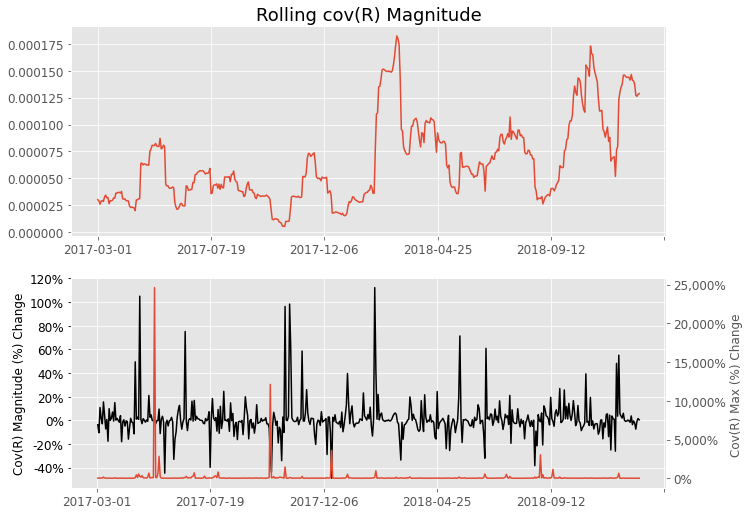

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(9,7))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)

rolling_stats['magnitude'].plot(ax=axes[0], fontsize=12); axes[0].set_title("Rolling cov(R) Magnitude", fontsize=18)


rolling_stats['magnitude'].pct_change().plot(ax=axes[1], fontsize=12, style ='black')
axes[1].tick_params(axis='y', colors='black')
ticks = axes[1].get_yticks()
axes[1].set_yticklabels(['{:,.0%}'.format(x) for x in ticks]);
axes[1].set_ylabel('Cov(R) Magnitude (%) Change', color='black')


twinax = axes[1].twinx()
rolling_stats['max change'].plot(ax=twinax, fontsize=12)
twinax.tick_params(axis='y')
ticks = twinax.get_yticks()
twinax.set_yticklabels(['{:,.0%}'.format(x) for x in ticks]);
twinax.set_ylabel('Cov(R) Max (%) Change ')
twinax.grid(None)


fig.savefig('Rolling_CovR.eps', dpi=200, bbox_inches='tight')

**e)** From Part 2.4.5 a) we have for every company $i$, and for every dfay $t$, the specific return $\epsilon_i$ with the following matrix:

\begin{equation*}
\mathbf{E} = \begin{bmatrix} \epsilon_{1,t=0} & \cdots & \epsilon_{157,t=0} \\ \epsilon_{1,t=1} & \cdots & \epsilon_{157,t=1} \\ \vdots & \ddots & \vdots \\ \epsilon_{1,t=5000} & \cdots & \epsilon_{157,t=500} \end{bmatrix} _{500 \times 157} \end{equation*}

We first compute the covariance matrix and perform PCA on it.

PCA is a dimensionality reduction method which takes the idea that the largest eignevlues and their corresponding eigenvectors carries the principal information about the behaviour of the matrix. In our case, that would mean that they represent the main variation direction.

We plot the eigenvalues in descending order in black in the figure below as well as the percentage of explained variance by the eignevlaues in red. We can observe that the larger eigenvalues capture most the variance and simply by taking the first principal component (largest eigenvalue and its eigenvector) we can explain over 7% of the total variance.

In [ ]:
covE = E.astype(float).cov()
eigvals, eigvecs = np.linalg.eigh(covE)
cum_explained_var = np.cumsum(eigvals[::-1]/sum(eigvals))

Percentage of the variance explained by the first principal component: 7.37%


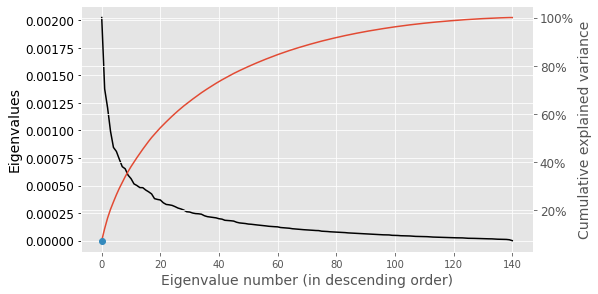

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
fig.tight_layout()

ax.plot(eigvals[::-1], color ='black')
ax.tick_params(axis='y', colors='black', labelsize=12)
ax.set_ylabel('Eigenvalues', color='black', fontsize=14)
ax.set_xlabel('Eigenvalue number (in descending order)', fontsize=14)


twinax = ax.twinx()
twinax.plot(cum_explained_var)
twinax.tick_params(axis='y', labelsize=12)
ticks = twinax.get_yticks()
twinax.set_yticklabels(['{:,.0%}'.format(x) for x in ticks]);
twinax.set_ylabel('Cumulative explained variance', fontsize=14)


twinax.plot(eigvals[-1], eigvals[-1]/sum(eigvals), 'o')
print('Percentage of the variance explained by the first principal component: {:.2%}'.format(eigvals[-1]/sum(eigvals)))

fig.savefig('PCA_Explained_Variance.eps', dpi=200, bbox_inches='tight')